# HW0 - Hello Vision World

In this HW you'll get acquainted with OpenCV in a Python-Jupyter environment.

If you're able to read this you were probably successfull at creating a Python-Jupyter environment.

To solve this exercise you will use Numpy, OpenCV, Scipy, Matplotlib, and Skimage.
This is a formidable stack of python tools. Master them and you will be unstoppable!

Consult the docs: 
- http://docs.opencv.org
- https://numpy.org/doc/stable/
- https://scikit-image.org/docs/stable/api/skimage.html
- https://docs.scipy.org/doc//scipy/index.html
- https://matplotlib.org/stable/index.html

Next we will import OpenCV, which is called `cv2` (that's the name of the OpenCV module) in python.

In [2]:
import cv2
import numpy as np
import scipy.linalg

If that executed without an error - you were also able to install OpenCV.

If that didn't run, try running `pip install opencv-python` or `apt-get install python-opencv` on ubuntu.

Next we will load a test image from scikit-image (`skimage`).

In [41]:
import skimage.data

In [42]:
image = skimage.data.astronaut()

An image is an array of pixels. It has HxWxC shape: (we can interrogate an image for its shape using `.shape`)

In [5]:
image.shape

(512, 512, 3)

This image has Height and Width of 512, and 3 channels: Red, Green, Blue

The channels are the last dimension, meaning the image is stored in memory where every pixel has 3 components, like so: RGB, RGB, RGB, RGB, ...

In [6]:
image[0,0]

array([154, 147, 151], dtype=uint8)

The first pixel in the image has the RGB code: `(154, 147, 151)`, which is kind of a grayish color.

Let's plot out a small patch of the image (10x10 pixels top-left):

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%magic

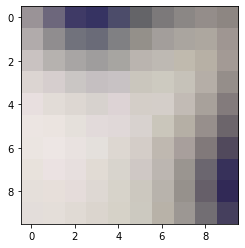

In [8]:
 #%%timeit x = image[0:10,0:10]
plt.imshow(image[0:10,0:10])

We can do many things with images, such as make them grayscale:

[[150 107  65 ... 122 117 120]
 [173 142 115 ... 120 117 116]
 [196 179 166 ... 122 119 116]
 ...
 [175 176 173 ...   0   0   0]
 [173 172 172 ...   0   1   0]
 [173 171 168 ...   0   1   0]]


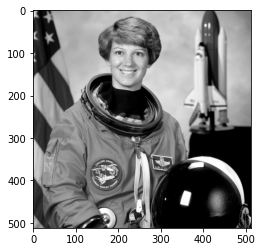

In [44]:
plt.imshow(cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY), cmap='gray')
print(cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY))

By default images have values \[0,255\] and their pixels are stored in `uint8` (bytes, unsigned chars)

In [10]:
image.dtype

dtype('uint8')

But we can change that easily, say to 32-bit floating point (e.g. `float32`):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


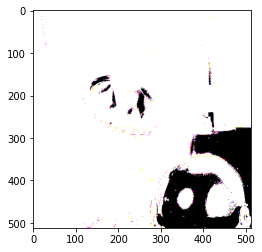

In [11]:
plt.imshow(image.astype(np.float32))

Ah, Matplotlib is complaining that floating point images are usually in range of \[0,1\] and not \[0,255\] like `uint8`s.

So we can easily divide the values element-wise:

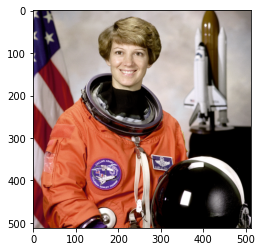

In [12]:
plt.imshow(image.astype(np.float32) / 255.)


Now it looks the same as before.

We can also flip images in different directions:

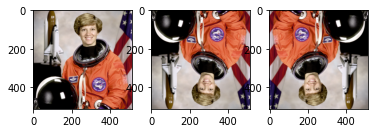

In [13]:
plt.subplot(1,3,1),plt.imshow(cv2.flip(image.copy(), 1))
plt.subplot(1,3,2),plt.imshow(cv2.flip(image.copy(), -1))
plt.subplot(1,3,3),plt.imshow(cv2.flip(image.copy(), 0));

We can blur them:

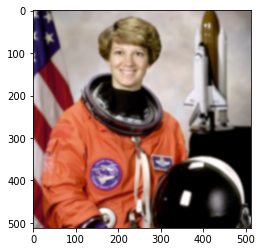

In [14]:
plt.imshow(cv2.GaussianBlur(image.copy(), ksize=(11,11), sigmaX=-1))

---
---

## Here comes your part

In the next sections you will code by yourself. Follow the hints as to what functions to use. Read up about them in the docs.

### Image blur

1) Load the astronaut image to a variable, convert to grayscale and convert to a [0,1] floating point.

2) Blur it with a 11x11 **Box filter** (`cv2.boxFilter`), and a 11x11 **Gaussian filter** (`cv2.GaussianBlur`)

3) Subtract the blurred images from the original

4) Show the results to the notebook (`plt.imshow(...)`) side-by-side (`plt.subplot(1,2,1)`), with a colorbar (`plt.colorbar()`)

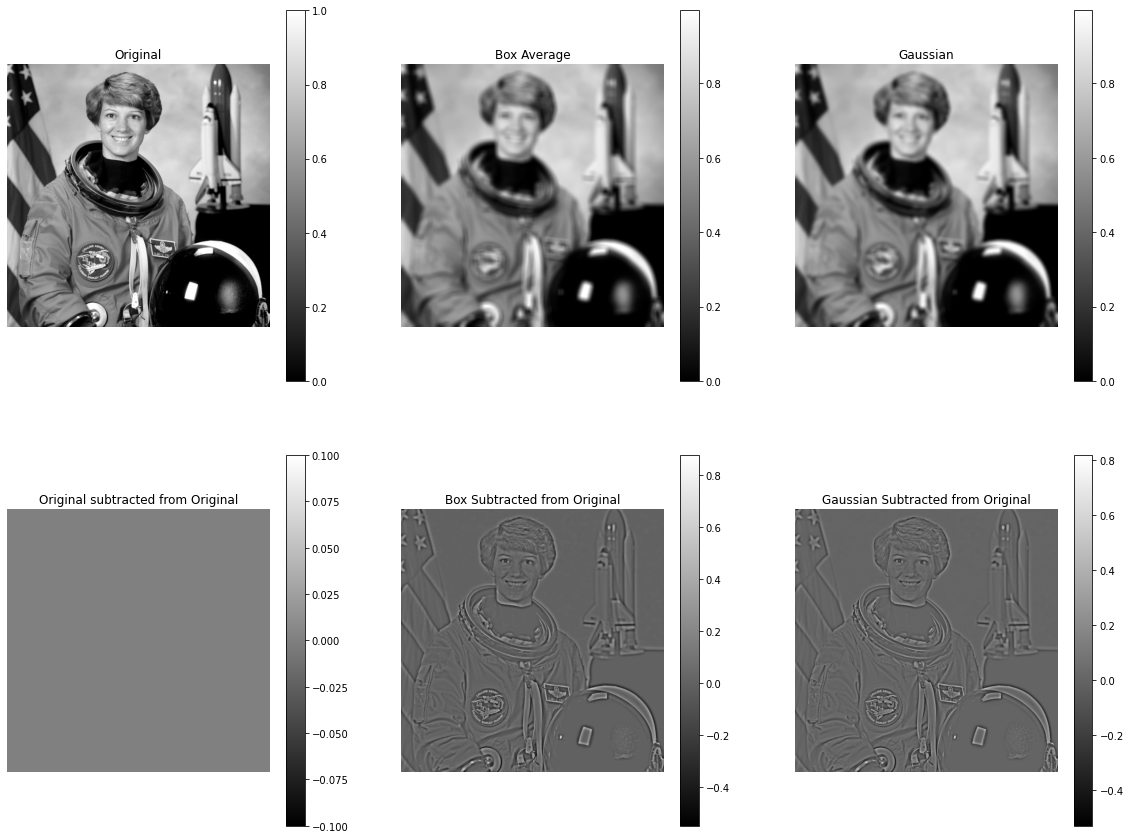

In [15]:
# TODO: your code here

import skimage.data
import cv2 as cv
image = skimage.data.astronaut()
image = cv.cvtColor(image.copy(), cv.COLOR_RGB2GRAY)
image = image.astype(np.float32) / 255
#plt.imshow(image) # original image

size = 11 #size of kernel (must be odd to acount for gaussian filter)

kernel = np.ones((size,size),np.float32)/size**2 # (size,size) matrix of 1's for the box filter
dst = cv.filter2D(image,-1,kernel) #convolution between the matrix and original image

gaussian = cv.GaussianBlur(image, (size,size), cv2.BORDER_DEFAULT)


f, axs = plt.subplots(2,3, figsize=(20, 15)) # create multiple graphs: subplot(x,y,z) x=rows, y=columns, 
#z=image in the ordered table of images :
# [1, 2, 3] 
# [4, 5, 6]

im1Color = axs[0, 0].imshow(image, cmap='gray')
axs[0,0].set_title('Original'), plt.colorbar(im1Color, ax=axs[0,0])
axs[0,0].axis('off')

im2Color = axs[0,1].imshow(dst, cmap='gray')
axs[0,1].set_title('Box Average'), plt.colorbar(im2Color, ax=axs[0,1])
axs[0,1].axis('off')

im3Color = axs[0,2].imshow(gaussian, cmap='gray')
axs[0,2].set_title('Gaussian'), plt.colorbar(im3Color, ax=axs[0,2])
axs[0,2].axis('off')

none = image - image
sub0Color = axs[1,0].imshow(none, cmap='gray')
axs[1,0].set_title('Original subtracted from Original'), plt.colorbar(sub0Color, ax=axs[1,0])
axs[1,0].axis('off')

boxSubtract = image - dst
sub1Color = axs[1,1].imshow(boxSubtract, cmap='gray')
axs[1,1].set_title('Box Subtracted from Original'), plt.colorbar(sub1Color, ax=axs[1,1])
axs[1,1].axis('off')

gaussianSubtract = image - gaussian
sub2Color = axs[1,2].imshow(gaussianSubtract, cmap='gray')
axs[1,2].set_title('Gaussian Subtracted from Original'), plt.colorbar(sub2Color, ax=axs[1,2])
axs[1,2].axis('off')

plt.show()

# plot the image after applying the box filter and the Gaussian filter
# plt.subplot(...

See how subtracting the blur (low frequencies) from the original has left only the edges (high frequencies).

Try different kernel sizes to see the effect on the edges.

### Colorspaces

1) Load the astronaut image (RGB)

2) Convert to HSV (use `cv2.cvtColor`)

3) Display the H, S and V components, side-by-side (`plt.subplot`, `plt.imshow`), each component (a.k.a "plane") in the image can be accessed by e.g. `image[..., 2]` for the 3rd component.

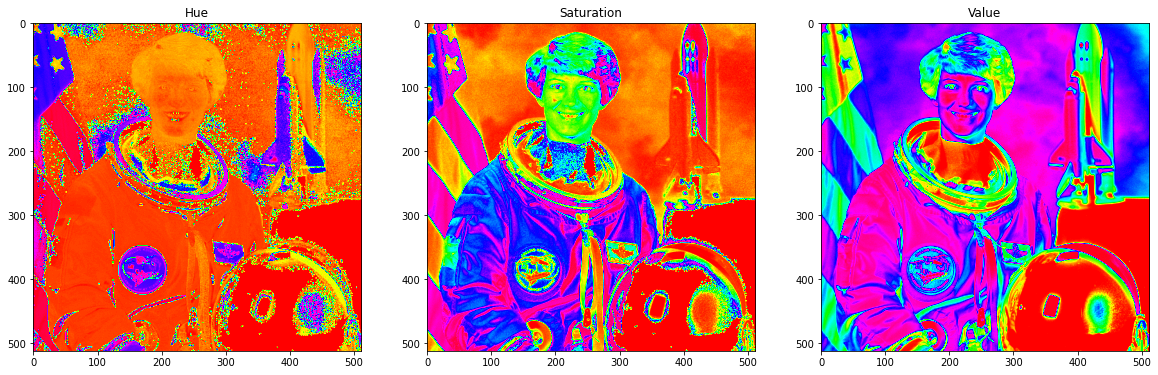

In [16]:
image = np.float32(skimage.data.astronaut()) / 255.

image_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)

f, axs = plt.subplots(1,3, figsize=(20, 10))

axs[0].imshow(image_hsv[:,:,0], cmap='hsv'), axs[0].set_title('Hue')
axs[1].imshow(image_hsv[:,:,1], cmap='hsv'), axs[1].set_title('Saturation')
axs[2].imshow(image_hsv[:,:,2], cmap='hsv'), axs[2].set_title('Value')
plt.show()

Change only the brightness of the image (add 0.2 to the `v`, "value", component) and display it again as the original. 
You will need to `cv2.cvtColor` back to RGB using `cv2.COLOR_HSV2RGB`.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


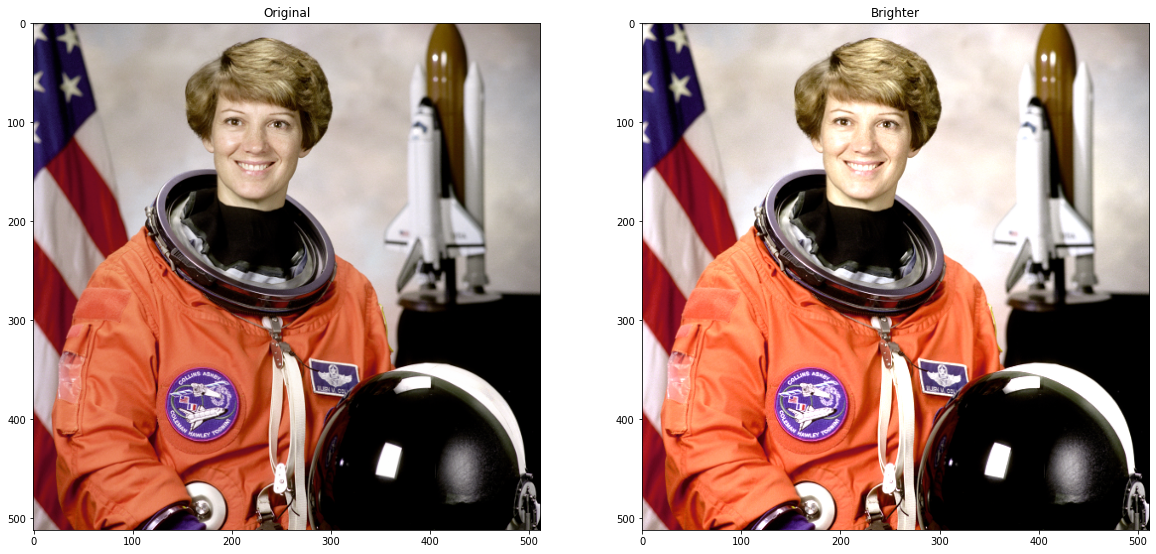

In [17]:

image = np.float32(skimage.data.astronaut()) / 255.

image_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)

image_hsv[..., 2] = image_hsv[..., 2]*1.2

back_to_RGB = cv.cvtColor(image_hsv, cv.COLOR_HSV2RGB)

f, axs = plt.subplots(1,2, figsize=(20, 10))

axs[0].imshow(image), axs[0].set_title('Original')
axs[1].imshow(back_to_RGB), axs[1].set_title('Brighter')
plt.show()


Plot all the colors in the astronaut image on the `rg` plane

First, normalize the colors, e.g. `r = R / (R + G + B)` and `g = G / (R + G + B)` and `b = B / (R + G + B)`

Use `np.sum` on the last (-1) axis, and add `np.finfo(np.float32).eps` to avoid division by zero

Then use a scatter plot `ax.scatter` to show the points (use `s=1` to make the points smaller)

For each point in the scatter show its color by adding `c=np.dstack([r,g,b]).reshape(-1,3)` to the `.scatter(` call

Thinking point: how much of the visible color gamut does this image cover?

1.0000001


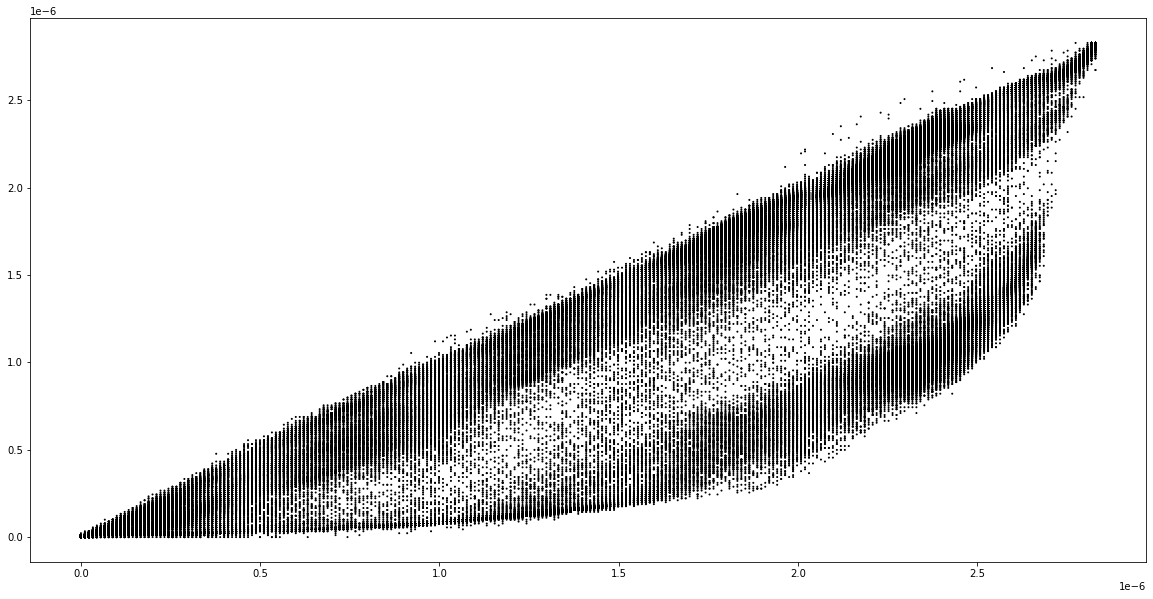

In [18]:
np.finfo(np.float32).eps
image = np.float32(skimage.data.astronaut()) / 255
fig, ax = plt.subplots(figsize=(20,10))


# compute the sum of the three channels
# use np.finfo(np.float32).eps to avoid division by zero
image[..., :] = image[...,:]/np.sum(image[...,:]) # normalize image

print(np.sum(image[...,:])) #show the sum is 1

# normalize the image so that the sum of the three channels is 1
# use the [..., 0] notation to access e.g. the first channel
r = image[..., 0] #/ np.sum(image[...,:])
g = image[..., 1] #/ np.sum(image[...,:])
b = image[..., 2] / np.sum(image[...,:])

# use the scatter function to plot the points
#ax.scatter(r,g, s=1 ,c=np.dstack([r,g,b]).reshape(-1,3))
ax.scatter(r,g, s=1, c=np.dstack([r,g,b]).reshape(-1,3))

### 3D Projection

Consider a group of 3D points. 

We have a 100 uniformly distributed points in a volume XYZ: \[-5,5\],\[-5,5\],\[5,100\] (the units are, say, meters).

Some points are close to us (the camera at `(0,0,0)`), they have low Z values, and some are farther away.

In [19]:
pts3d = np.hstack([np.random.uniform(-5,5,(1000, 2)),np.random.uniform(5,100,(1000, 1))])[:,np.newaxis,:]
pts3d.shape

(1000, 1, 3)

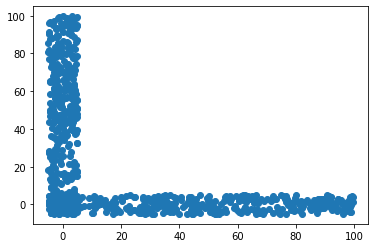

In [20]:
reshape = np.reshape(pts3d, (3,1000))
plt.scatter(reshape[0,:],reshape[1,:])

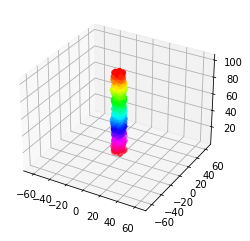

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pts3d[:,0,0],pts3d[:,0,1],pts3d[:,0,2],c=-pts3d[:,0,2],cmap='hsv');
ax.set_aspect('equal');

You're given the following intrinsics matrix (`K`):

In [22]:
K = np.array([[800,0,320],[0,800,240],[0,0,1]], dtype=np.float32)
print(K)


[[800.   0. 320.]
 [  0. 800. 240.]
 [  0.   0.   1.]]


Calculate the 2D projection of the 3D points on the image plane, and plot them (`plt.scatter`).

Try doing the calculation yourself, using matrix multiplication for the entire group, and also using `cv2.projectPoints`.

Try changing the `K` matrix focal length parameters to see how it affects the projection.

In [23]:
# notice the shape of the points array. it has a redundant dimension!
pts3d.shape

(1000, 1, 3)

(3, 1000)

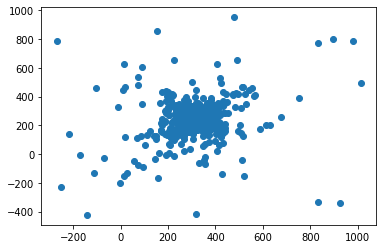

In [24]:
# TODO: your code here


# use the np.matmul function to multiply the matrix K with the points
# use the np.squeeze function to remove the singleton dimension in pts3d
#squeezed = np.squeeze(pts3d)

proj_homog = np.matmul(K, np.squeeze(pts3d).T) #squeeze and transpose to get (3,1000)

# then normalize the points by dividing by the third coordinate
#proj_homog = np.reshape(proj_homog, (3,1000))
x = proj_homog[0,:]/proj_homog[2,:]
y = proj_homog[1,:]/proj_homog[2,:]
plt.scatter(x,y)
#plt.scatter(proj_homog[0,:],proj_homog[1,:])
# proj = ...
proj_homog.shape

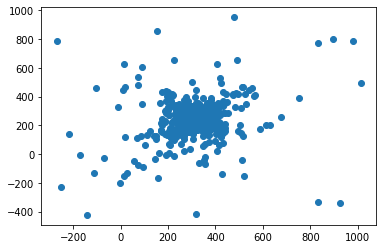

In [25]:
ones = np.array([1, 1, 1])
proj, _  = cv.projectPoints(pts3d, np.zeros(3), np.zeros(3), K, np.zeros(5))
#print(proj[:,:,0])
#proj = np.reshape(proj, (2,1000))
#proj.shape
plt.scatter(proj[:,:,0],proj[:,:,1])
#plt.scatter(proj[])
#,cv.projectPoints(pts3d, np.zeros(3), np.zeros(3), cameraMatrix=K, np.zeros(5))
#[0,:]
#[1,:]

Consider a 3D cube:

In [26]:
# cube veritces
Z = np.array([[-1,-1,-1],[1,-1,-1],[1,1,-1],[-1,1,-1],[-1,-1,1],[1,-1,1],[1,1,1],[-1,1,1]])
Z[:,2] += 10 # translate on Z
Z[:,0] += 2  # translate on X

# list of faces
faces = [[Z[0],Z[1],Z[2],Z[3]],
         [Z[4],Z[5],Z[6],Z[7]], 
         [Z[0],Z[1],Z[5],Z[4]], 
         [Z[2],Z[3],Z[7],Z[6]], 
         [Z[1],Z[2],Z[6],Z[5]],
         [Z[4],Z[7],Z[3],Z[0]]]

(8, 3)

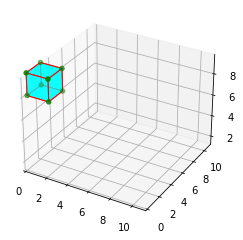

In [27]:
# Plot the cube in 3D
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.75))
ax.scatter(Z[:,0], Z[:,1], Z[:,2], c="green") #corners
ax.set_xlim(0,11), ax.set_ylim(0,11), ax.set_zlim(0,11) 
ax.set_aspect('equal') # uniform scale axes
Z.shape

Use the same method from before to project the 3D points to 2D

In [28]:
# TODO: your code here
proj_homog = np.matmul(K, Z.T)
print(proj_homog.shape)
#x = proj_homog[0,:]/proj_homog[2,:]
#y = proj_homog[1,:]/proj_homog[2,:]
pts2d = np.zeros((8,2))
pts2d[:,0] = proj_homog[0,:]/proj_homog[2,:]
pts2d[:,1] = proj_homog[1,:]/proj_homog[2,:]
pts2d.shape


(3, 8)


(8, 2)

In [29]:
# list of 2D faces
faces2d = [[pts2d[0],pts2d[1],pts2d[2],pts2d[3]],
           [pts2d[4],pts2d[5],pts2d[6],pts2d[7]], 
           [pts2d[0],pts2d[1],pts2d[5],pts2d[4]], 
           [pts2d[2],pts2d[3],pts2d[7],pts2d[6]], 
           [pts2d[1],pts2d[2],pts2d[6],pts2d[5]],
           [pts2d[4],pts2d[7],pts2d[3],pts2d[0]]]

Now we can plot the cube projected on our 2D image:

<ipython-input-30-08aed1d8ea40>:5: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches += [Polygon(np.squeeze(p), True)]


(0.0, 480.0)

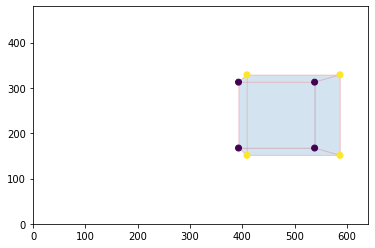

In [30]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
patches = []
for p in np.array(faces2d):
    patches += [Polygon(np.squeeze(p), True)]

fig=plt.figure()
ax = fig.add_subplot(111)
ax.add_collection(PatchCollection(patches, alpha=0.1, linewidths=1, edgecolors='r'))
ax.scatter(pts2d[:,0],pts2d[:,1],c=-Z[:,2])
ax.set_xlim(0,640)
ax.set_ylim(0,480)

Try to change the translation of the 3D points, as well as the K matrix, and see how it affects the 2D projection.

Try a smaller focal parameter and a bigger one.

---

## Least Squares

Let's practice a little bit of least squares fitting (under some conditions you may know this as "linear regression")

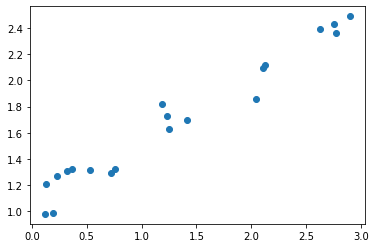

In [31]:
# ramdomize 20 2d points around a line with the given slope and intercept
slope = 0.5
intercept = 1
pts2d = np.random.uniform(0,3,(20,2))
pts2d[:,1] = slope * pts2d[:,0] + intercept
pts2d += np.random.normal(0,0.1,(20,2))
plt.scatter(pts2d[:,0],pts2d[:,1])

(2,)
[0.48590128 1.04588618]


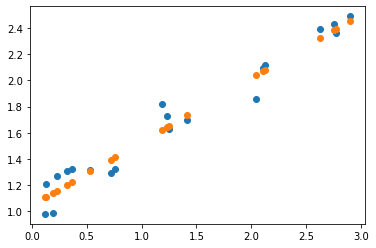

In [34]:
# fit a line to the points using linear least squares from scipy
from scipy.optimize import least_squares



def objective_fun(x, pts):
 
    return  np.array(((pts[:,1] - (x[1]+x[0]*pts[:,0]))**2)/(1+x[0]**2)) #distance function

   


x0 = np.array([0,0]) #initial guess
print(x0.shape)
x = np.array([])
res = least_squares(objective_fun, x0, args=([pts2d])) #run least squares

print(res.x)

plt.scatter(pts2d[:,0],pts2d[:,1]) # original graph
plt.scatter(pts2d[:,0], res.x[0]*pts2d[:,0]+res.x[1]) # plotting using the least squares solution



#plt.line()
plt.show()


In the next cell we will use SVD to fit a 3D plane "in the least squares sense". Recall our conversation in class about homogenous systems of linear equations.

The 3D plane has the form `a*x + b*y + c*z + d = 0` where `(a, b, c)` is effectively the normal to the plane and `d` is the distance from the origin.

With the 3D data below we will do a "trick". Subtract the centroid (mean, average) of the values so that they all center around 0, 0, 0. 

This will make finding the best fit plane easier, since now we're only looking for a "direction" - the normal to the plane. We eliminate the plane's last parameter - distance from the origin.

Luckily the SVD can give us just that!

(512, 512, 3)
0.44918457312091503
5.921189464667502e-18


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 3)
[-0.19116197  0.77456523 -0.60291442]
3
(3, 6400)


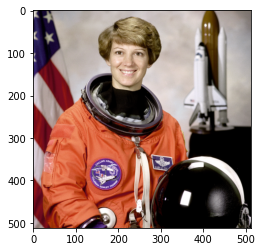

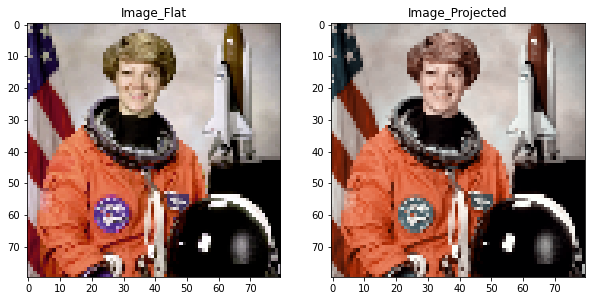

In [35]:
# we will use the pixel colors of the astronaut image as our 3D points

# TODO: your code here
image = skimage.data.astronaut()
# take all the pixel colors (r, g, b) in the astronaut image and cast them to [0,1] float (divide by 255.)
image = image[:,:,:]/255
plt.imshow(image)
print(image.shape)

# resize the image to 20x20
# use cv2.resize to resize the image

image = cv.resize(image, [80,80])

# reshape the image pixels array to a list of 3D points
# use np.reshape to reshape the image to a 2D array with shape (-1, 3)
image_flat = np.reshape(image, (-1,3))

# subtract the mean of the pixels colors
# use np.mean to get the mean of the pixels colors
mean_color = np.mean(image_flat[:,:])
print(mean_color) #confirm mean (u) is: 0 < u < 1 (greater than or equal)
# use np.subtract to subtract the mean color from the pixels colors
image_flat = np.subtract(image_flat[:,:], mean_color)
print(np.mean(image_flat[:,:])) #confirm mean is 0

# use np.linalg.svd to get the singular values and vectors of the pixels colors matrix
_, _, vT = np.linalg.svd(image_flat)
# the plane parameters are the last singular vector, get the last (-1) singular vector from vT
print(vT.shape)
v = vT[-1,:]

print(v)

# project the pixels colors to the 3D plane by multiplying the pixels colors by the plane parameters

# loop over the pixels array and set the pixels colors to the projected colors
image_projected = np.zeros(image_flat.shape)
print(image_flat.shape[1])
for i in range(image_flat.shape[0]):
    
    # project point image_flat[i] to the plane. the plane parameters are v.
    image_projected[i,:] = image_flat[i,:] - (np.dot(image_flat[i,:],v))*v

    # remember that point to plane projection is: p - (p dot v) * v
    # use np.dot to multiply the pixels color by the plane parameters
    # then subtract the projected point from the pixels color
    # image_projected[i] = ...

# plot the original image *and* the projected image in 2 subplots
f, axs = plt.subplots(1,2, figsize=(10,5))
print(image_projected.T.shape)

image_flat = image_flat[:,:] + mean_color
image_projected = image_projected[:,:] + mean_color

#print(image_projected)

reshaped_from_flat = np.reshape(image_flat,image.shape)
reshaped_from_projected = np.reshape(image_projected,image.shape)

#np.reshape(image_projected,(512, 512, 3))

axs[0].imshow(reshaped_from_flat), axs[0].set_title('Image_Flat')
axs[1].imshow(reshaped_from_projected), axs[1].set_title('Image_Projected')
plt.show()
# reshape image_flat and image_projected to the original shape (image.shape) by using np.reshape
# remember to add the mean color to the pixels colors!


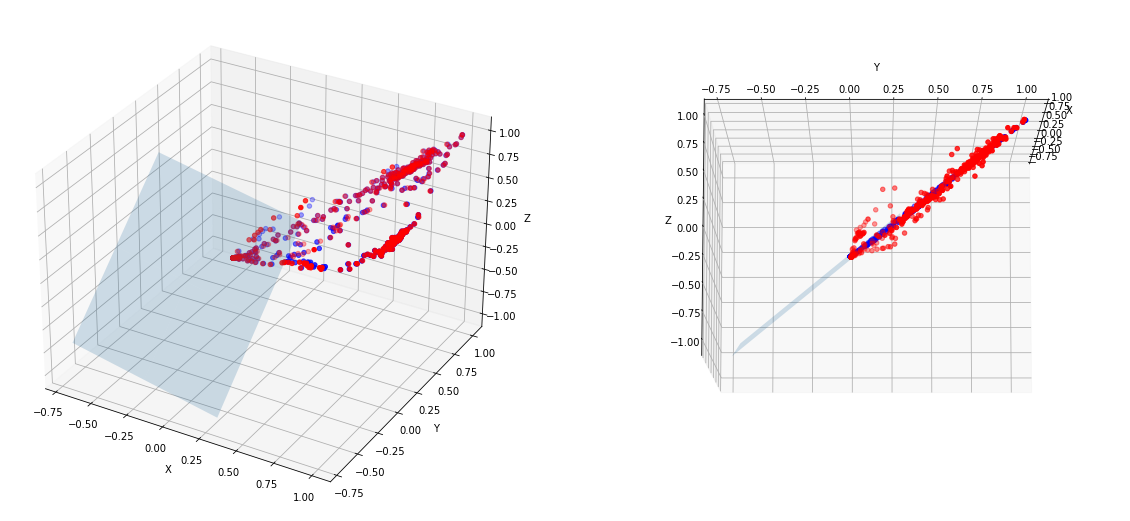

In [ ]:
# this code plots the 3D plane and the pixels colors
# it is not part of the exercise but you can use it to check your results
# v is the plane parameters
# image_projected is the projected pixels colors
# image_flat is the original pixels colors

xx, yy = np.meshgrid(np.arange(-0.7,0.7,0.5), np.arange(-0.7,0.7,0.5))
z = (-v[0] * xx - v[1] * yy) / v[2]

fig = plt.figure(figsize=(20,10))
for figid in [1, 2]:
    # scatter the pixels colors
    ax = fig.add_subplot(1,2,figid, projection='3d')
    ax.scatter(image_projected[:,0], image_projected[:,1], image_projected[:,2],c='b')
    ax.scatter(image_flat[:,0], image_flat[:,1], image_flat[:,2], c='r')
    # plot the surface
    ax.plot_surface(xx, yy, z, alpha=0.2)

    plt.xlabel('X')
    plt.ylabel('Y')
    ax.set_zlabel('Z')
    ax.axis('auto')
    if figid == 2:
        ax.view_init(-9, 0, 0)

plt.show()

Well done!

You've completed HW1, you're well on your way to become a computer vision practitioner.